# ensemble learning

## steps of bagging
- import libraries
- fit classifier (module)
- check accuracy
- compare all outputs or predictions 

In [1]:
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.impute import SimpleImputer

In [2]:
# loading Data set
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [5]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [6]:
# applying label emcoding on labels(target) columns
encoder = LabelEncoder()
df.Survived = encoder.fit_transform(df['Survived']) 
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [7]:
# dropping first column
df.Sex.unique()

array(['male', 'female'], dtype=object)

In [8]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
# dropping first column
df.Survived.unique()

array([0, 1], dtype=int64)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [11]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

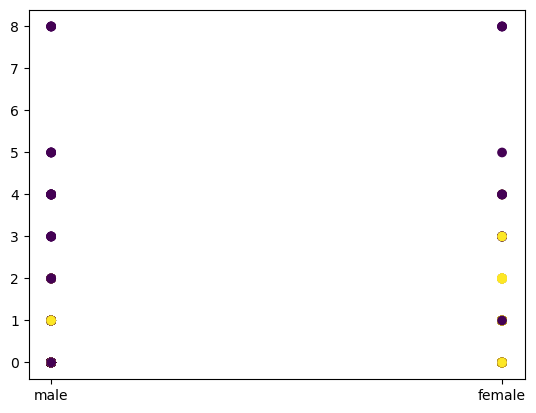

In [12]:
plt.scatter(df['Sex'],df['SibSp'],c=df['Survived'],cmap=None) #yellow and purple for 1,2 environment

In [13]:
df = df.sample(100)

In [14]:
# considering first 60 records are trainnig data 
df_train = df.iloc[:60,:].sample(10)

# considering next 20 record after 60  are validation
df_val = df.iloc[60:80,:].sample(5)

# considering next 20 record after 60  are testing data
df_test = df.iloc[80:,:].sample(5)

In [49]:
# train data labels from trian data 
X_train = df_train.iloc[:,1:7].values
y_train = df_train.iloc[:,0].values

In [50]:
# validation data and labels from validation data 
X_val = df_val.iloc[:,1:7].values
y_val= df_val.iloc[:,0].values

In [51]:
X_test = df_val.iloc[:,1:7].values
y_test = df_val.iloc[:,0].values

In [52]:
y_test

array([1, 0, 1, 0, 1], dtype=int64)

# Case 1 - Bagging

In [53]:
!pip install mlxtend #downloading 

ERROR: Invalid requirement: '#downloading'


In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [55]:
def evaluate(clf,X,y): #fitting classifier clf=Classifier
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2, feature_index=[0,7])#filler_feature_values={1:1,2: .75, 3: .75},
                         #filler_feature_ranges={1:1,2: .75, 3: .75},ax=ax)
  #filler_feature_values={1:1.5,2: 1.5, 3: 1.5},)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))
    

In [56]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True) #train sample

X = df_bag.iloc[:,1:7] #indexing
y = df_bag.iloc[:,0]

df_bag

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
858,1,3,female,24.0,0,3,19.2583,C
505,0,1,male,18.0,1,0,108.9000,C
292,0,2,male,36.0,0,0,12.8750,C
622,1,3,male,20.0,1,1,15.7417,C
568,0,3,male,NaN,0,0,7.2292,C
505,0,1,male,18.0,1,0,108.9000,C
781,1,1,female,17.0,1,0,57.0000,S
568,0,3,male,NaN,0,0,7.2292,C


In [57]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    
    y_pred1 = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred1))
    

In [58]:
dt_bag1 = DecisionTreeClassifier()

In [ ]:
evaluate(dt_bag1,X,y)

In [26]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,[1,4]]
y = df_bag.iloc[:,0]

# print df_bag
df_bag

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
505,0,1,male,18.0,1,0,108.9000,C
258,1,1,female,35.0,0,0,512.3292,C
282,0,3,male,16.0,0,0,9.5000,S
258,1,1,female,35.0,0,0,512.3292,C
781,1,1,female,17.0,1,0,57.0000,S
622,1,3,male,20.0,1,1,15.7417,C
282,0,3,male,16.0,0,0,9.5000,S
505,0,1,male,18.0,1,0,108.9000,C


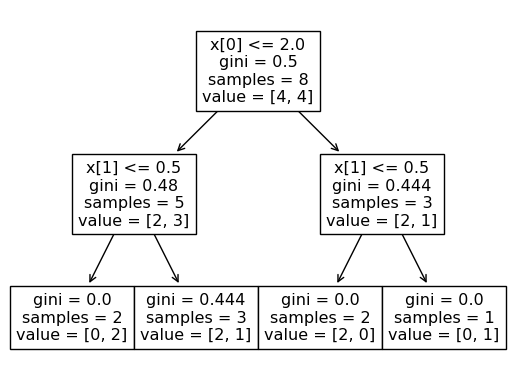

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.4


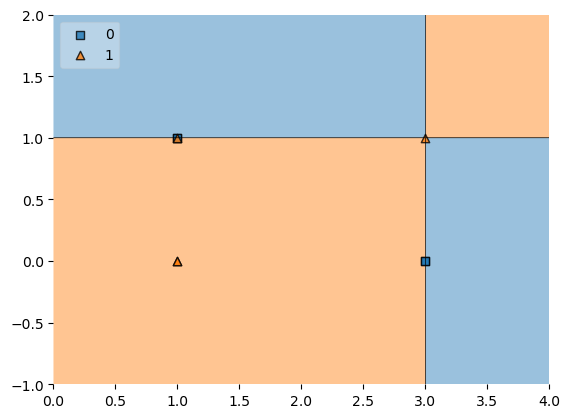

In [27]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [28]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,[1,4]]
y = df_bag.iloc[:,0]

# print df_bag
df_bag

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
568,0,3,male,NaN,0,0,7.2292,C
568,0,3,male,NaN,0,0,7.2292,C
282,0,3,male,16.0,0,0,9.5000,S
858,1,3,female,24.0,0,3,19.2583,C
282,0,3,male,16.0,0,0,9.5000,S
505,0,1,male,18.0,1,0,108.9000,C
282,0,3,male,16.0,0,0,9.5000,S
568,0,3,male,NaN,0,0,7.2292,C


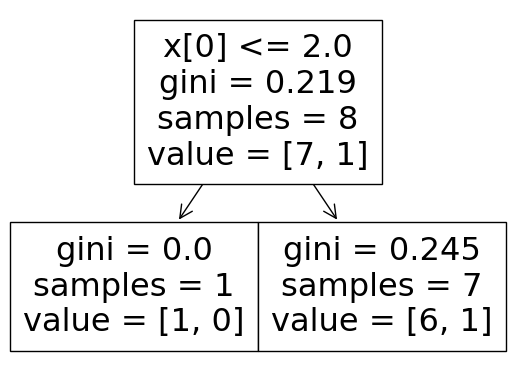

0.4


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


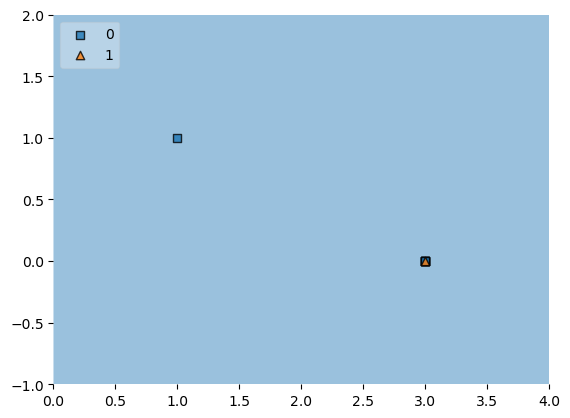

In [29]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

In [30]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))
    

## Predict

In [31]:
df_test

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
412,1,1,female,33.0,1,0,90.0000,Q
411,0,3,male,NaN,0,0,6.8583,Q
488,0,3,male,30.0,0,0,8.0500,S
771,0,3,male,48.0,0,0,7.8542,S
24,0,3,female,8.0,3,1,21.0750,S


In [32]:
import numpy as np

In [33]:
print("Predictor 1",dt_bag1.predict(np.array([1,1]).reshape(1,2))) #chaecking output of all three 
print("Predictor 2",dt_bag2.predict(np.array([1,1]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([1,1]).reshape(1,2)))

Predictor 1 [0]
Predictor 2 [0]
Predictor 3 [0]


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Pasting

In [34]:
# Method 1
# Row sampling without replacement
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
505,0,1,male,18.0,1,0,108.9000,C
781,1,1,female,17.0,1,0,57.0000,S
292,0,2,male,36.0,0,0,12.8750,C
622,1,3,male,20.0,1,1,15.7417,C
568,0,3,male,NaN,0,0,7.2292,C
258,1,1,female,35.0,0,0,512.3292,C
542,0,3,female,11.0,4,2,31.2750,S
858,1,3,female,24.0,0,3,19.2583,C
506,1,2,female,33.0,0,2,26.0000,S
282,0,3,male,16.0,0,0,9.5000,S


In [35]:
df_train.sample(8)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
505,0,1,male,18.0,1,0,108.9000,C
542,0,3,female,11.0,4,2,31.2750,S
858,1,3,female,24.0,0,3,19.2583,C
506,1,2,female,33.0,0,2,26.0000,S
292,0,2,male,36.0,0,0,12.8750,C
258,1,1,female,35.0,0,0,512.3292,C
282,0,3,male,16.0,0,0,9.5000,S
622,1,3,male,20.0,1,1,15.7417,C


# Random Subspaces

In [36]:
df1 = sns.load_dataset('iris')
df1 = df1.sample(10)

In [37]:
df1

,sepal_length,sepal_width,petal_length,petal_width,species
37,4.9,3.6,1.4,0.1,setosa
115,6.4,3.2,5.3,2.3,virginica
21,5.1,3.7,1.5,0.4,setosa
145,6.7,3.0,5.2,2.3,virginica
7,5.0,3.4,1.5,0.2,setosa
92,5.8,2.6,4.0,1.2,versicolor
39,5.1,3.4,1.5,0.2,setosa
52,6.9,3.1,4.9,1.5,versicolor
67,5.8,2.7,4.1,1.0,versicolor
84,5.4,3.0,4.5,1.5,versicolor


In [38]:
df1.sample(2,replace=True,axis=1)

,petal_length,petal_width
37,1.4,0.1
115,5.3,2.3
21,1.5,0.4
145,5.2,2.3
7,1.5,0.2
92,4.0,1.2
39,1.5,0.2
52,4.9,1.5
67,4.1,1.0
84,4.5,1.5


# Random Patches
- column sampling

In [41]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
397,0,2,male,46.0,0,0,26.0000,S
605,0,3,male,36.0,1,0,15.5500,S
100,0,3,female,28.0,0,0,7.8958,S
858,1,3,female,24.0,0,3,19.2583,C
404,0,3,female,20.0,0,0,8.6625,S
...,...,...,...,...,...,...,...,...
141,1,3,female,22.0,0,0,7.7500,S
26,0,3,male,NaN,0,0,7.2250,C
60,0,3,male,22.0,0,0,7.2292,C
713,0,3,male,29.0,0,0,9.4833,S


In [42]:
df.sample(8,replace=True).sample(2,replace=True,axis=1)

,Survived,Sex
60,0,male
404,0,female
858,1,female
514,0,male
835,1,female
434,0,male
404,0,female
764,0,male
